In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

df18_23 = pd.read_csv('../Data/ProducedData/refined_df18_23.csv')

Permuting ALDAYPWK over Poverty Level values to see how significant our observed values in the graph below are

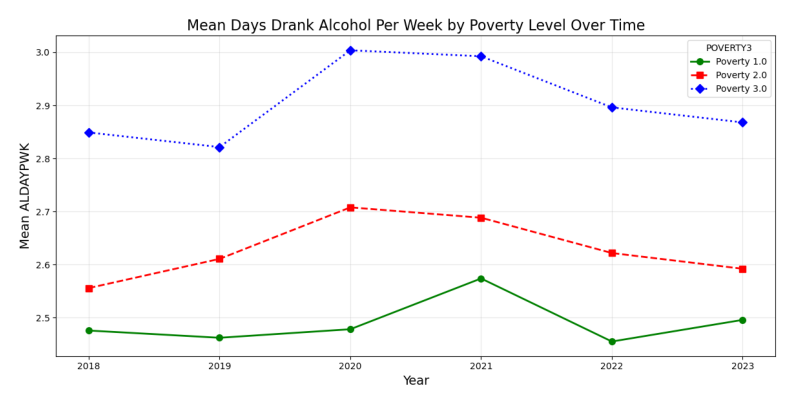

In [15]:
x = '../Images/mean_days_drank_alc_per_wk_by_poverty_over_time.png'

img = mpimg.imread(x)
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis('off')
plt.show()

In [38]:
ALPWK_pov_means = df18_23.groupby(['YEAR','POVERTY3'])['ALDAYPWK'].mean().reset_index()
ALPWK_pov_means

,YEAR,POVERTY3,ALDAYPWK
0,2018,1.0,2.475847
1,2018,2.0,2.555879
2,2018,3.0,2.849011
3,2019,1.0,2.462264
4,2019,2.0,2.610846
5,2019,3.0,2.821447
6,2020,1.0,2.478326
7,2020,2.0,2.707892
8,2020,3.0,3.003809
9,2021,1.0,2.573964


In [44]:
dfdf = df18_23[['YEAR','POVERTY3','ALDAYPWK']].dropna()

In [54]:
APK_means = [ALPWK_pov_means]
num_sim = 1000
for_sim = dfdf.copy()
ALDAYPWK_cols = for_sim['ALDAYPWK'].to_list()

for i in range(num_sim-1):
    np.random.shuffle(ALDAYPWK_cols)
    for_sim['ALDAYPWK'] = ALDAYPWK_cols
    sim_means = for_sim.groupby(['YEAR','POVERTY3'])['ALDAYPWK'].mean().reset_index()
    APK_means.append(sim_means)

APK_means_df = pd.concat(APK_means, keys=range(num_sim))
APK_means_df.groupby(['YEAR','POVERTY3'])['ALDAYPWK'].mean().reset_index()


,YEAR,POVERTY3,ALDAYPWK
0,2018,1.0,2.812741
1,2018,2.0,2.814095
2,2018,3.0,2.813916
3,2019,1.0,2.811829
4,2019,2.0,2.813239
5,2019,3.0,2.812570
6,2020,1.0,2.811907
7,2020,2.0,2.809249
8,2020,3.0,2.812421
9,2021,1.0,2.811278


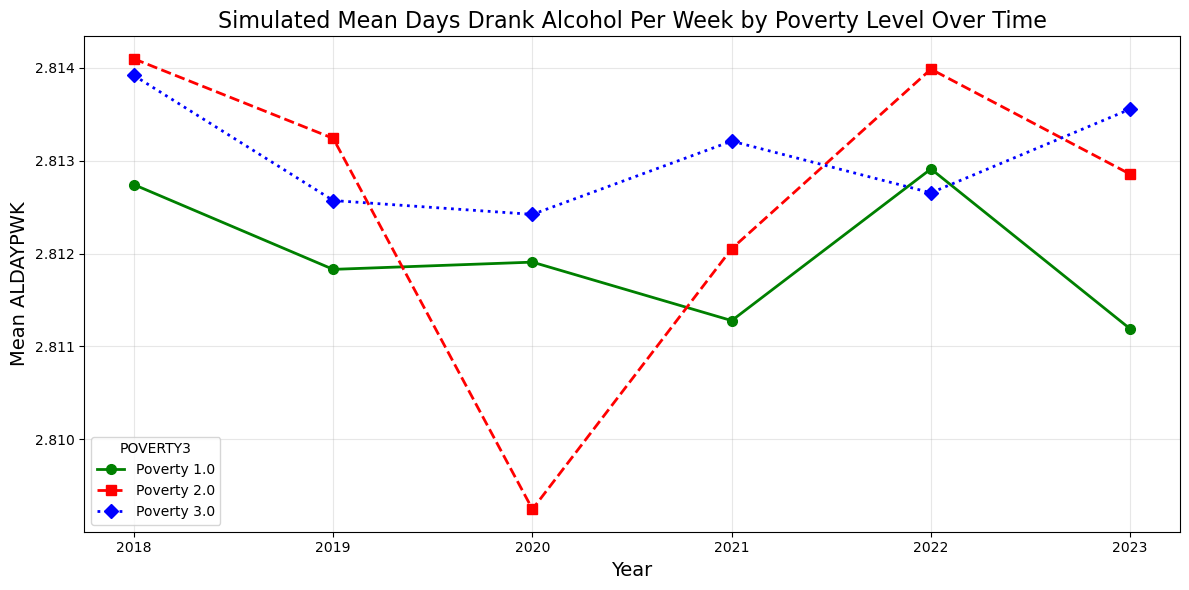

In [55]:
APKgrouped = APK_means_df.groupby(['YEAR','POVERTY3'])['ALDAYPWK'].mean().reset_index()

APKpivot_df = APKgrouped.pivot(index='YEAR', columns='POVERTY3', values='ALDAYPWK')

styles = {
    1.0: {"color": "green",  "marker": "o", "linestyle": "-"},
    2.0: {"color": "red",   "marker": "s", "linestyle": "--"},
    3.0: {"color": "blue", "marker": "D", "linestyle": ":"},
}

plt.figure(figsize=(12,6))

for col in APKpivot_df.columns:
    style = styles.get(col, {})
    plt.plot(
        APKpivot_df.index,
        APKpivot_df[col],
        label=f"Poverty {col}",
        linewidth=2,
        markersize=7,
        **style
    )

plt.title("Simulated Mean Days Drank Alcohol Per Week by Poverty Level Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Mean ALDAYPWK", fontsize=14)
plt.legend(title="POVERTY3")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../Images/sim_mean_days_drank_alc_per_wk_by_poverty_over_time.png')
plt.show()

In [33]:
df18_23 = df18_23.copy()
df18 = df18_23[df18_23['YEAR'] == 2018]
df19 = df18_23[df18_23['YEAR'] == 2019]
df20 = df18_23[df18_23['YEAR'] == 2020]
df21 = df18_23[df18_23['YEAR'] == 2021]
df22 = df18_23[df18_23['YEAR'] == 2022]
df23 = df18_23[df18_23['YEAR'] == 2023]

dflist = [df18,df19,df20,df21,df22,df23]

In [ ]:
df18means = df18.groupby('POVERTY3')['ALDAYPWK'].mean().reset_index()

,POVERTY3,ALDAYPWK
0,1.0,2.475847
1,2.0,2.555879
2,3.0,2.849011
